# DBSCAN 실습
**(Density_Based Spatial Clustering of Applications with Noise)**

데이터의 공간을 다루는 알고리즘이다. 전체 공간에서 데이터가 가장 밀집된 영역을 찾는다. 그리고 그 밀집 영역이 하나의 클러스터로 정해진다.

밀집 정도를 파악하기 위해 데이터 포인트 간 거리를 측정하게되며, 해당 거리를 어떤 방법으로 측정하느냐에 따라 클러스터링 형태가 달라진다.

또한 포인트 방문은 랜덤으로 시작하나, 포인트 방문 순서에 따라 라벨링 되는 클러스터가 다를 수 있다.

거리 측정 방법은 DBSCAN 함수에서 metric으로 조절 가능하다 (기본값은 유클리드 거리).

> 장점: 클러스터 개수를 사전에 정하지 않아도 됨

> 단점: min_ssamples(최소한의 데이터 포인트 개수, default = 5)와 eps(반경)을 정해주어야 함

> 개넘: 특정 데이터 포인트에서 eps 반경 내 min_samples를 포함한다면 해당 포인트는 core point로 지정된다. 해당 core point 내의 데이터 포인트들은 하나의 클러스터로 분류되며, 속하지만 핵심 포인트가 아닌 포인트는 border point(경계 포인트)라고 한다. 

어느 곳에도 속하지 않게 되는 포인트는 noise point로 분류된다.




##### 알고리즘

1. 무작위로 초기 핵심 데이터 포인트가 선정됨.
2. 해당 지점 중심으로 min_samples가 eps내 충족되지 않으면 해당 시작지점은 noise point가 됨
3. 만약 만족하는 경우 핵심 포인트로 라벨링하고 새로운 클러스터로 라벨링함.
4. eps 거리 내의 데이터를 확인한 후 해당 데이터 포인트가 클러스터 라벨이 정해지지 않았다면 핵심 포인트와 같은 클러스터로 라벨링 됨.


여러번 실행하면 핵심 포인트의 클러스터는 항상 같고 매번 같은 포인트를 노이즈로 라벨링 한다. 하지만 경계 포인트는 여러개의 서로 다른 클러스터의 핵심 포인트의 이웃일 가능성이 있기 때문에 어떤 클러스터에 속할 지는 포인트 방문 순서에 따라 달라진다.


---

평가는 군집 모델 성능 평가에 쓰이는 실루엣 스코어를 사용한다.

##### 11.4.3 임의로 데이터를 생성하여 클러스터링 해보는 실습.

# Data generating
## 임의 데이터 생성

In [1]:
from sklearn.datasets import make_moons # 초승달 모양으로 랜덤 샘플 생성, 해당 함수의 피처수는 2로 고정되어있다.

X, y = make_moons(n_samples = 300,     # 300개, 노이즈는 데이터가 흩어진 정도. 5개의 그룹을 중심으로 샘플 데이터 생성
                  noise = 0.05, 
                  random_state = 0)

## 생성된 데이터 차원 확인

In [2]:
print(X.shape)
print(y.shape)

(300, 2)
(300,)


피처 데이터는 2차원 데이터 300개가 생성되어있다. 타깃 데이터의 차원은 1차원 데이터가 300개 생성되어있는 상태. (300행 1열)

## unlabeled data plot

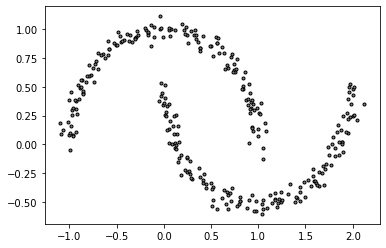

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1],       # 피처 1과 2가 각각 x, y축으로 스캐터플롯 그리기
           c = 'gray',
           edgecolor = 'black',
           marker = '.')
plt.show()

# DBSCAN
## clustering

In [5]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps = 0.2)                # min_samples = default 5, eps = 0.2
dbs.fit(X)
label_dbs = dbs.labels_

[0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0
 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1
 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0
 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1
 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1
 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1
 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0
 0 1 1 0]


In [6]:
# 각 데이터 포인트가 어디에 속하게 되었는지 확인

label_dbs

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0])

## to data frame

In [7]:
# 시각화를 위해 데이터 프레임으로 만들어준다
import pandas as pd

dbs_columns = ['dbs_comp1', 'dbs_comp2']           # 피처 이름 
X_dbs_df = pd.DataFrame(X, columns = dbs_columns)  # 데이터 프레임 생성
X_dbs_df['target'] = y                             # 정답에 해당하는 데이터를 새로운 열로 추가
X_dbs_df['label_dbs'] = label_dbs                  # 클러스터링하여 정해진 라벨을 열에 추가
X_dbs_df.head(5)

,dbs_comp1,dbs_comp2,target,label_dbs
0,0.715413,-0.494089,1,0
1,0.246789,-0.240091,1,0
2,0.943261,0.346800,0,1
3,0.973742,-0.492901,1,0
4,1.239713,-0.411411,1,0


In [8]:
# 타깃 데이터의 이름 checking : 0, 1 
# set 함수는 python에서 데이터 리스트에서 유일값만 보여주는 함수 : set이라는 클래스로 출력된다.
print(set(X_dbs_df['target']))

# dbs 군집의 이름을 확인
print(set(X_dbs_df['label_dbs']))

{0, 1}
{0, 1}


각각 0과 1로 라벨링이 되어있다. 구분한다는 의미에서는 차이가 없기 때문에 순서나 0,1 수 자체는 상관 없다.

## DBSCAN 클러스터링 결과 시각화: 데이터 플롯

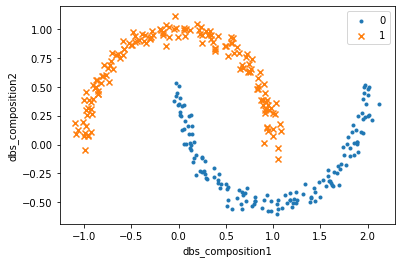

In [11]:
df = X_dbs_df
markers = ['.', 'x']   # marker 리스트!

for i, mark in enumerate(markers):    # 5개 클러스터로 5개 마커 각각 대응되도록 정해준다.
    df_i = df[df['label_dbs'] == i]   # 라벨이 i인 클러스터 데이터들만 데리고
    target_i = i                      # 타깃 이름
    X1 = df_i['dbs_comp1']            # 각각 x축과 y축이 될 것
    X2 = df_i['dbs_comp2']
    plt.scatter(X1, X2, marker = mark, label = target_i) # 위의 정보들로 산점도를 그린다. 라벨은 각 i가 될 것

plt.xlabel('dbs_composition1')
plt.ylabel('dbs_composition2')
plt.legend()
plt.show()

## 실제 타깃 플롯

실제 타깃 데이터(정답 데이터)를 이용한 플롯을 확인한다.

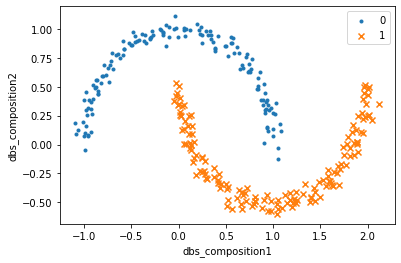

In [12]:
df = X_dbs_df
markers = ['.', 'x']   # marker 리스트!

for i, mark in enumerate(markers):    # 5개 클러스터로 5개 마커 각각 대응되도록 정해준다.
    df_i = df[df['target'] == i]      # 라벨이 i인 클러스터 데이터들만 데리고
    target_i = i                      # 타깃 이름
    X1 = df_i['dbs_comp1']            # 각각 x축과 y축이 될 것
    X2 = df_i['dbs_comp2']
    plt.scatter(X1, X2, marker = mark, label = target_i) # 위의 정보들로 산점도를 그린다. 라벨은 각 i가 될 것

plt.xlabel('dbs_composition1')
plt.ylabel('dbs_composition2')
plt.legend()
plt.show()

0과 1이 서로 바뀌었다는 것 빼고는 별다른 큰 차이가 보이지 않는다.

# 모형 평가

클러스터링 모형 평가는 실루엣 스코어 함수를 사용한다. 

값은 피처 값과 모형을 통해 만들어진 라벨링 값을 넣어준다.

In [13]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, label_dbs)
print(sil_score)

0.3284782012631504


### Commentary

생각보다 결과가 별로인 것 같은 느낌이 든다. 

# 실험1: noise =0.1 인 데이터

data shape:  (300, 2)
target shpae:  (300,)


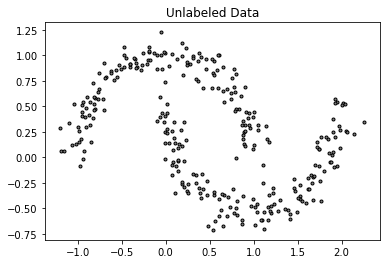

target names:  {0, 1}
labeled names:  {0}


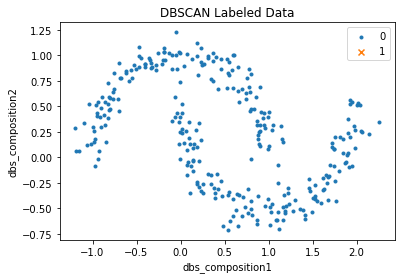

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [16]:
# random data generating
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 300, noise = 0.1, random_state = 0)

# check the shape
print("data shape: ", X.shape)
print("target shpae: ", y.shape)

# unlabeled data visualizing
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1],       # 피처 1과 2가 각각 x, y축으로 스캐터플롯 그리기
           c = 'gray',
           edgecolor = 'black',
           marker = '.')
plt.title("Unlabeled Data")
plt.show()

# DBSCAN
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps = 0.2)                # min_samples = default 5, eps = 0.2
dbs.fit(X)
label_dbs = dbs.labels_

# making dataframe for visualization
import pandas as pd
dbs_columns = ['dbs_comp1', 'dbs_comp2']           # 피처 이름 
X_dbs_df = pd.DataFrame(X, columns = dbs_columns)  # 데이터 프레임 생성
X_dbs_df['target'] = y                             # 정답에 해당하는 데이터를 새로운 열로 추가
X_dbs_df['label_dbs'] = label_dbs                  # 클러스터링하여 정해진 라벨을 열에 추가

# target(label)name checking
# set 함수는 python에서 데이터 리스트에서 유일값만 보여주는 함수 : set이라는 클래스로 출력된다.
print("target names: ", set(X_dbs_df['target']))
# dbs 군집의 이름을 확인
print("labeled names: ", set(X_dbs_df['label_dbs']))

# K-means-labeled data visualizing
df = X_dbs_df
markers = ['.', 'x']   # marker 리스트!

for i, mark in enumerate(markers):    # 5개 클러스터로 5개 마커 각각 대응되도록 정해준다.
    df_i = df[df['label_dbs'] == i]   # 라벨이 i인 클러스터 데이터들만 데리고
    target_i = i                      # 타깃 이름
    X1 = df_i['dbs_comp1']            # 각각 x축과 y축이 될 것
    X2 = df_i['dbs_comp2']
    plt.scatter(X1, X2, marker = mark, label = target_i) # 위의 정보들로 산점도를 그린다. 라벨은 각 i가 될 것

plt.xlabel('dbs_composition1')
plt.ylabel('dbs_composition2')
plt.title("DBSCAN Labeled Data")
plt.legend()
plt.show()

# scoring model
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X, label_dbs)
print("Silhouette score :", sil_score)

상당히 귀여운 상태라는 것을 알 수 있다. DBSCAN이 라벨한 데이터는 원래의 데이터의 형태에서 데이터가 밀집된 지역을 찾는 것은 이해하겠지만 모든 데이터를 한 클러스터로 구분해버리면서 클러스터링의 의미가 없어졌다. 
 
 # 실험2: eps = 0.3
 
 이번에는 반경을 조금 넓혀보도록 하겠다.

data shape:  (300, 2)
target shpae:  (300,)


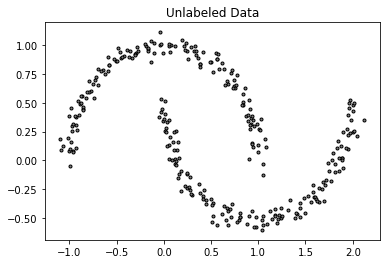

target names:  {0, 1}
labeled names:  {0, 1}


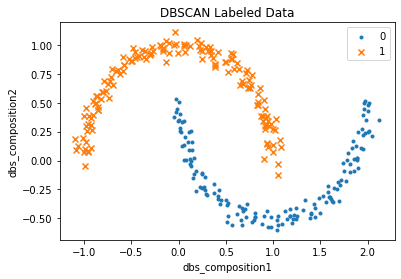

Silhouette score : 0.3284782012631504


In [17]:
# random data generating
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 300, noise = 0.05, random_state = 0)

# check the shape
print("data shape: ", X.shape)
print("target shpae: ", y.shape)

# unlabeled data visualizing
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1],       # 피처 1과 2가 각각 x, y축으로 스캐터플롯 그리기
           c = 'gray',
           edgecolor = 'black',
           marker = '.')
plt.title("Unlabeled Data")
plt.show()

# DBSCAN
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps = 0.3)                            # min_samples = default 5, eps = 0.2
dbs.fit(X)
label_dbs = dbs.labels_

# making dataframe for visualization
import pandas as pd
dbs_columns = ['dbs_comp1', 'dbs_comp2']           # 피처 이름 
X_dbs_df = pd.DataFrame(X, columns = dbs_columns)  # 데이터 프레임 생성
X_dbs_df['target'] = y                             # 정답에 해당하는 데이터를 새로운 열로 추가
X_dbs_df['label_dbs'] = label_dbs                  # 클러스터링하여 정해진 라벨을 열에 추가

# target(label)name checking
# set 함수는 python에서 데이터 리스트에서 유일값만 보여주는 함수 : set이라는 클래스로 출력된다.
print("target names: ", set(X_dbs_df['target']))
# dbs 군집의 이름을 확인
print("labeled names: ", set(X_dbs_df['label_dbs']))

# K-means-labeled data visualizing
df = X_dbs_df
markers = ['.', 'x']   # marker 리스트!

for i, mark in enumerate(markers):    # 5개 클러스터로 5개 마커 각각 대응되도록 정해준다.
    df_i = df[df['label_dbs'] == i]   # 라벨이 i인 클러스터 데이터들만 데리고
    target_i = i                      # 타깃 이름
    X1 = df_i['dbs_comp1']            # 각각 x축과 y축이 될 것
    X2 = df_i['dbs_comp2']
    plt.scatter(X1, X2, marker = mark, label = target_i) # 위의 정보들로 산점도를 그린다. 라벨은 각 i가 될 것

plt.xlabel('dbs_composition1')
plt.ylabel('dbs_composition2')
plt.title("DBSCAN Labeled Data")
plt.legend()
plt.show()

# scoring model
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X, label_dbs)
print("Silhouette score :", sil_score)

약간의 반경 수정은 괜찮은 것으로 보인다. 충분히 데이터가 모여있다면 괜찮겠지!

하지만 실험1처럼 노이즈가 많아서 거리가 서로서로 적당히 가까이 있는 것으로 구분되면 클러스터링이 어려울 수 있을 것으로 생각된다.

# 실험3: min_samples 5->10 변경

원래는 거리측정 방법을 변경해보려고 했으나 파라미터에는 네모모양으로 되도록만 측정하는 것 외에는 다른 안내가 없어서 찾아보았지만 실패...

data shape:  (300, 2)
target shpae:  (300,)


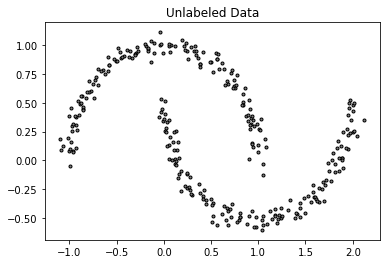

target names:  {0, 1}
labeled names:  {0, 1, -1}


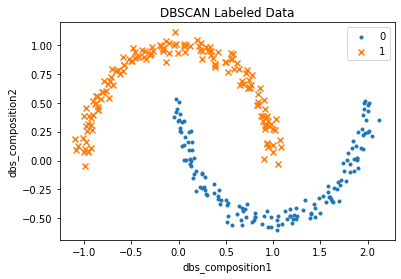

Silhouette score : -0.028393183485888117


In [23]:
# random data generating
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 300, noise = 0.05, random_state = 0)

# check the shape
print("data shape: ", X.shape)
print("target shpae: ", y.shape)

# unlabeled data visualizing
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1],       # 피처 1과 2가 각각 x, y축으로 스캐터플롯 그리기
           c = 'gray',
           edgecolor = 'black',
           marker = '.')
plt.title("Unlabeled Data")
plt.show()

# DBSCAN
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps = 0.2, min_samples = 10)          # min_samples = default 5, eps = 0.2
dbs.fit(X)
label_dbs = dbs.labels_

# making dataframe for visualization
import pandas as pd
dbs_columns = ['dbs_comp1', 'dbs_comp2']           # 피처 이름 
X_dbs_df = pd.DataFrame(X, columns = dbs_columns)  # 데이터 프레임 생성
X_dbs_df['target'] = y                             # 정답에 해당하는 데이터를 새로운 열로 추가
X_dbs_df['label_dbs'] = label_dbs                  # 클러스터링하여 정해진 라벨을 열에 추가

# target(label)name checking
# set 함수는 python에서 데이터 리스트에서 유일값만 보여주는 함수 : set이라는 클래스로 출력된다.
print("target names: ", set(X_dbs_df['target']))
# dbs 군집의 이름을 확인
print("labeled names: ", set(X_dbs_df['label_dbs']))

# K-means-labeled data visualizing
df = X_dbs_df
markers = ['.', 'x']   # marker 리스트!

for i, mark in enumerate(markers):    # 5개 클러스터로 5개 마커 각각 대응되도록 정해준다.
    df_i = df[df['label_dbs'] == i]   # 라벨이 i인 클러스터 데이터들만 데리고
    target_i = i                      # 타깃 이름
    X1 = df_i['dbs_comp1']            # 각각 x축과 y축이 될 것
    X2 = df_i['dbs_comp2']
    plt.scatter(X1, X2, marker = mark, label = target_i) # 위의 정보들로 산점도를 그린다. 라벨은 각 i가 될 것

plt.xlabel('dbs_composition1')
plt.ylabel('dbs_composition2')
plt.title("DBSCAN Labeled Data")
plt.legend()
plt.show()

# scoring model
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X, label_dbs)
print("Silhouette score :", sil_score)

10으로 올려도 꽤 안정적인 모습을 보이지만 실루엣 스코어가 상당히 떨어진 것을 볼 수 있다.

In [22]:
import sklearn 
sklearn.metrics.pairwise_distances

<function sklearn.metrics.pairwise.pairwise_distances(X, Y=None, metric='euclidean', *, n_jobs=None, force_all_finite=True, **kwds)>